<h2>Optimisation M1 - TP3 - Correction</h2>

<h3>Débruitage</h3>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
def produitScalaireMatrice(x, y):
    return np.sum(x*y)

On va chercher dans cette partie à mettre au point un algorithme de débruitage d'une image via la résolution d'un problème d'optimisation par la méthode du gradient conjugué. L'image source (non bruitée) est donnée dans le code suivant

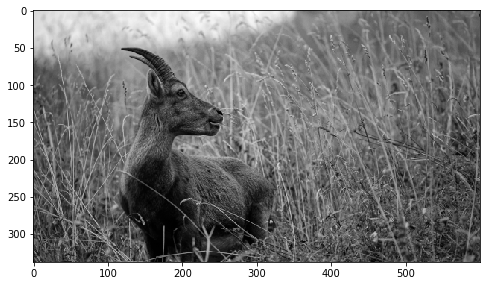

In [2]:
plt.figure(figsize = (8, 6))
img_original = plt.imread('bouquetin.png').astype(float) # chargement de l'image
img_original = sum([img_original[:, :, i] for i in range(2)]) # on transforme l'image en noir et blanc
plt.imshow(img_original, cmap = 'gray') # affichage de l'image
plt.show()

On va maintenant dégrader l'image par un bruit additif gaussien (en pratique on aurait uniquement accès à l'image bruitée, ici on cré "artificiellement" le bruit).

In [3]:
m, n = img_original.shape # m représente le nombre de ligne de l'image, n le nombre de colonne
bruit = .15 * np.random.randn(m, n) # bruit gaussien qui va être appliqué sur l'image
img_bruite = img_original + bruit # on bruite additivement l'image

1) Afficher l'image bruitée.

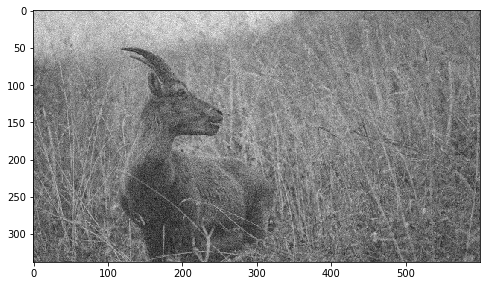

In [4]:
plt.figure(figsize = (8, 6))
plt.imshow(img_bruite, cmap = 'gray') # affichage de l'image
plt.show()

Dans la suite les images seront vues comme des tableaux de valeur (chaque pixel est un nombre représentant le niveau de gris), c'est à dire des matrices à $m$ lignes et $n$ colonnes. Dans le cours nous avons vu la résolution de problème d'optimisation sur $\mathbb{R}^p$, on notera que l'on peut considérer sans ambiguité des problèmes d'optimisation sur $\mathcal{M}_{m,n}(\mathbb{R})$ puisque cette espace vectoriel est isomorphe à $\mathbb{R}^{mn}$.

On va maintenant chercher à débruiter l'image ci-dessus (i.e. diminuer l'impact du bruit). La méthode ici adopter va consister à résoudre le problème d'optimisation suivant
$$
\min_{x\in\mathcal{M}_{m,n}(\mathbb{R})} F(x),
$$
où
$$
F(x) = \frac12 \sum_{i=1}^m\sum_{j=1}^n (x_{i,j} - y_{i,j})^2 + \frac{\lambda}2 \sum_{i=1}^{m-1}\sum_{j=1}^n (x_{i+1,j} - x_{i,j})^2 + \frac{\lambda}2 \sum_{i=1}^{m}\sum_{j=1}^{n-1} (x_{i,j+1} - x_{i,j})^2.
$$
$y\in\mathcal{M}_{m,n}(\mathbb{R})$ est l'image bruitée (la donnée du problème) et $\lambda>0$ une constante.

2) Quel est la dimension de ce problème d'optimisation ?

La dimension du problème d'optimisation est $nm=\dim(\mathcal{M}_{m,n}(\mathbb{R}))$. Soit ici ~200k.

3) Interpréter $F$.

$F$ est composé de trois termes. Le premier représente un terme d'attache aux données : il mesure l'erreur quadratique au carrée entre une estimation $x$ et la donnée du problème $y$ (l'image bruitée). Les deux autres termes mesurent la variation de $x$ entre deux pixels successifs respectivement verticalement et horizontalement. En minimisant cette fonction objective, on va ainsi obtenir un $x$ ($F$ admet un unique minimum global, cf ci-dessous) qui est proche de la donnée du problème tout en lissant les variations locales : on atténue ainsi l'impact du bruit. Le compromis entre être proche des données et l'atténuation du bruit est controlé par le paramètre $\lambda$ (plus $\lambda$ est grand plus l'image sera lissée car les deux derniers termes deviennent plus pénalisant s'ils sont grands). L'inconvénient de cette méthode est que l'image obtenue devient flou : c'est le prix à payer de cette approche de débruitage. D'autres fonctions objectives peuvent être considérées pour à la fois débruiter mais préserver la netteté des contours.

4) Démontrer que $F$ peut s'écrire sous la forme
$$
\forall x\in\mathcal{M}_{m,n}(\mathbb{R}), \quad F(x) = \frac12 \langle \mathcal{A}(x), x \rangle - \langle b, x\rangle + c,
$$
où
<ul>
<li>$\langle \cdot, \cdot \rangle$ est le produit scalaire canonique sur l'espace $\mathcal{M}_{m,n}(\mathbb{R})$, c'est-à-dire $\langle x, x' \rangle = \mbox{Tr}(x^Tx') = \sum_{i,j} x_{i,j}x'_{i,j}$,</li>
<li>$\mathcal{A}:\mathcal{M}_{m,n}(\mathbb{R})\to\mathcal{M}_{m,n}(\mathbb{R})$ un opérateur linéaire tel que $\mathcal{A}(x) = x + \lambda L^TL x + \lambda xCC^T$, avec $L\in\mathcal{M}_{m,m}(\mathbb{R})$ la matrice avec des $-1$ sur la diagonale, $1$ sur la sur-diagonale et $L_{m,m}=0$, et $C\in\mathcal{M}_{n,n}(\mathbb{R})$ la matrice avec des $-1$ sur la diagonale, $1$ sur la sous-diagonale et $C_{n,n}=0$,</li>
<li>$b=y\in\mathcal{M}_{m,n}(\mathbb{R})$ et $c = \frac12 \|y\|_2^2$.</li>
</lu>

On a $F(x) = \frac12 \langle x - y, x - y\rangle + \frac\lambda2 \langle Lx, Lx\rangle + \frac\lambda2 \langle xC, xC\rangle$. D'où la réponse après développement/regroupement, en utilisant notamment pour le dernier terme le fait que $\langle xC, xC\rangle = \mbox{Tr}((xC)^TxC) = \mbox{Tr}(C^Tx^TxC) = \mbox{Tr}(x^TxCC^T) = \langle x, xCC^T\rangle$, puisque $\mbox{Tr}(AB) = \mbox{Tr}(BA)$.

5) Démontrer que $\mathcal{A}$ est un endomorphisme symétrique, c'est-à-dire pour tous $x,x'\in\mathcal{M}_{m,n}(\mathbb{R})$, $\langle \mathcal{A}(x), x' \rangle = \langle x, \mathcal{A}(x') \rangle$ puis que $\mathcal{A}$ est définie positive, c'est-à-dire pour tous $x\neq0$, $\langle \mathcal{A}(x), x \rangle >0$.

On a $\langle \mathcal{A}(x), x' \rangle = \langle x, x' \rangle + \lambda\langle L^TLx, x' \rangle + \lambda\langle xCC^T, x' \rangle = \langle x, x' \rangle + \lambda\langle x, L^TLx' \rangle + \lambda\langle x, x'CC^T \rangle = \langle x, \mathcal{A}(x') \rangle$. D'où $\mathcal{A}$ est un endormorphisme symétrique.

Ensuite $\langle \mathcal{A}(x), x \rangle = \|x\|_2^2 + \|Lx\|_2^2 + \|Cx\|_2^2 \geq \|x\|_2^2 > 0$ dès que $x\neq 0$. D'où $\mathcal{A}$ est un endormorphisme symétrique défini positif.

6) Que peut-on en conclure sur $F$ ? Et justifier que $F$ admet un unique minimum global.

D'après le cours, $F$ est une fonctionnelle quadratique. $F$ admet un unique point fixe (car $\mathcal{A}$ est inversible puisque symétrique défini positif) et comme $F$ est convexe (puisque $\mathcal{A}$ positif) $F$ admet donc un unique minimum global.

Une autre justification : on a démontré en 5) que $F$ est fortement convexe donc $F$ admet un unique minimum global (car $F$ est coercive et strictement convexe).

7) Ecrire une fonction $\mbox{opA}$ qui prend comme argument $x$ et qui renvoie $\mathcal{A}(x)$. On pourra commencer par créer les deux matrices $L$ et $C$ à l'aide de la commande np.eye (penser à regarder l'effet par exemple de np.eye(4) et np.eye(4, k = 1)).

In [5]:
L = - np.eye(m) + np.eye(m, k = 1)
L[m - 1, m - 1] = 0

C = - np.eye(n) + np.eye(n, k = -1)
C[n - 1, n - 1] = 0

def opA(x):
    return (lbda*np.dot(np.dot(np.transpose(L), L), x) + lbda*np.dot(x, np.dot(C, np.transpose(C))) + x)

On va maintenant utiliser l'algorithme du gradient conjuguée pour trouver le minimum global de 

8) Ecrire une fonction $\mbox{gradientConjugue}$, qui prend en argument $\mbox{A}$ un opérateur linéaire, $\mbox{b}$, $\mbox{x0}$ un point de départ, $\mbox{tol}$ une tolérance et $\mbox{Niter}$ un nombre maximal d'itérations. Et qui renvoie l'approximée du minimum global et la liste des normes des gradients.

On pensera à utiliser la fonction $\mbox{produitScalaireMatrice}$, définit au tout début du TP, pour calculer les produits scalaires entre deux matrices.

In [6]:
def gradientConjugue(A, b, x0, tol, Niter = 200):
    gx = A(x0) - b # gradient de F
    d = gx # d à l'itération 0
    Ad = A(d)
    t = produitScalaireMatrice(gx, d)/produitScalaireMatrice(Ad, d)
    x = x0 - t*d
    normGrad =  np.linalg.norm(gx)
    listeGrad = [normGrad]
    n = 1
    while normGrad > tol and n < Niter:
        gx = A(x) - b
        normGrad = np.linalg.norm(gx)
        d = gx + normGrad**2/listeGrad[-1]**2 * d # formule pour d_{k+1}, cf cours
        Ad = A(d)
        t = produitScalaireMatrice(gx, d)/produitScalaireMatrice(Ad, d)
        x = x - t*d
        
        listeGrad.append(normGrad)
        n += 1
    
    return x, listeGrad

9) Utiliser l'algorithme pour le résoudre le problème d'optimisation. On prendra pour l'instant $\lambda = 2$.

In [7]:
lbda = 2
b = img_bruite # b = y (= image bruitée d'après précédentes questions)
x0 = img_bruite # on peut démarrer l'algorithme en n'importe quel point de l'espace d'optimisation. On choisit de démarrer avec l'image de départ
x, listeGrad_gc = gradientConjugue(opA, b, x0, 1e-10)

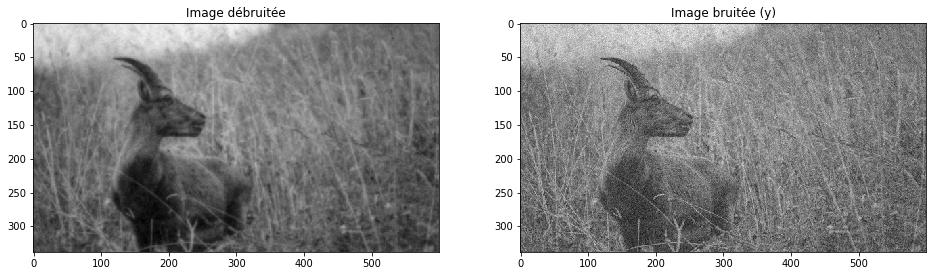

In [8]:
plt.figure(figsize = (16, 16))
#
plt.subplot(1, 2, 1)
plt.imshow(x, cmap = 'gray')
plt.title('Image débruitée')
#
plt.subplot(1,2,2)
plt.imshow(img_bruite, cmap = 'gray')
plt.title('Image bruitée (y)')
#
plt.show()

10) Illustrer la convergence de l'algorithme. Commenter.

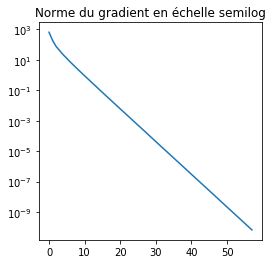

In [9]:
plt.figure(figsize = (4, 4))
plt.semilogy(listeGrad_gc)
plt.title('Norme du gradient en échelle semilog')
plt.show()

On a une droite en échelle semilog (les ordonnées en échelle logarithmique) pour la norme des gradients en chaque itéré. Donc la convergence est linéaire, comme prédit par le cours.

11) Discuter de l'influence de $\lambda$.

Plus $\lambda$ est grand plus l'image devient flou (on lisse plus l'image).

12) Résoudre le même problème avec la méthode du gradient à pas optimal. Comparer les deux convergences.

In [10]:
def descente_gradient_pas_optimal(A, b, x0, epsilon):
    x = x0
    gx = A(x) - b
    listeGrad = [np.linalg.norm(gx)]
    while listeGrad[-1] > epsilon:
        t = produitScalaireMatrice(gx, gx)/produitScalaireMatrice(A(-gx), -gx) # valeur du pas optimal (on a l'expression pour une fonctionnelle quadratique)
        x = x - t*gx
        gx = A(x) - b
        listeGrad.append(np.linalg.norm(gx))
    return x, listeGrad

In [11]:
lbda = 2
b = img_bruite
x0 = np.zeros((m, n))
x, listeGrad_go = descente_gradient_pas_optimal(opA, b, x0, 1e-3)

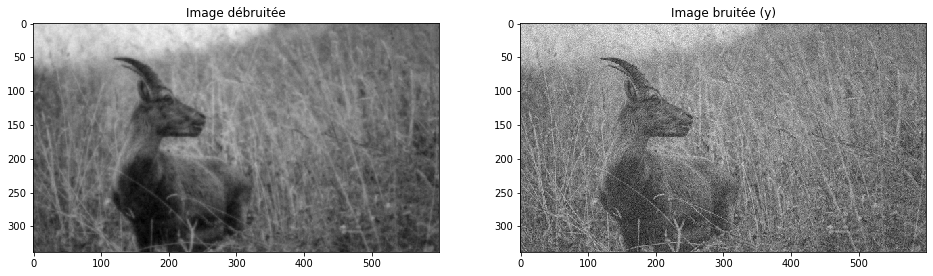

In [12]:
plt.figure(figsize = (16, 16))
#
plt.subplot(1, 2, 1)
plt.imshow(x, cmap = 'gray')
plt.title('Image débruitée')
#
plt.subplot(1,2,2)
plt.imshow(img_bruite, cmap = 'gray')
plt.title('Image bruitée (y)')
#
plt.show()

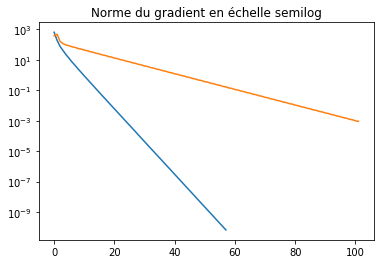

In [13]:
plt.figure(figsize = (6, 4))
plt.semilogy(listeGrad_gc, label = 'gradient conjugué')
plt.semilogy(listeGrad_go, label = 'gradient pas optimal')
plt.title('Norme du gradient en échelle semilog')
plt.show()

On remarque la convergence plus rapide de la méthode du gradient conjuguée (pente plus négative), comme prédit par le cours (voir les taux de convergence linéaire respectifs des deux méthodes).

<h4>Bonus</h4>

13) Donner le nombre de fois que l'on applique l'opérateur $\mbox{A}$ dans la boucle principale des deux algorithmes ci-dessous.

Deux fois.

14) Il est possible d'écrire une version de ces algorithmes où $\mbox{A}$ n'est appliquée qu'une seule fois par itération (et donc d'améliorer significativement la vitesse de l'algorithme (meilleure complexité)). Pour cela calculer $\nabla F(x_{k+1}) - \nabla F(x_k)$ pour les deux algithmes et montrer que le calcul du nouveau gradient $\nabla F(x_{k+1})$ peut ainsi utiliser le précédent et une application de l'opérateur $\mbox{A}$ déjà calculé dans la boucle.

On a $\nabla F(x_{k+1}) - \nabla F(x_k) = \mathcal{A}(x_{k+1}) - b - (\mathcal{A}(x_{k}) - b) = \mathcal{A}(x_{k+1} - x_k)$. Donc pour la méthode du gradient conjugué, on a $\nabla F(x_{k+1}) - \nabla F(x_k) = \mathcal{A}(-t_k d_k) = -t_k A(d_k)$. Ainsi on peut calculer le nouveau gradient $\nabla F(x_{k+1})$ à l'aide du précédent et de $A(d_k)$. En stockant $A(d_k)$ dans une variable, on a plus besoin d'évaluer $\mathcal{A}$ pour déterminer le nouveau gradient en $x_{k+1}$, on a ainsi qu'une seule évaluation de $\mathcal{A}$ par passage dans la boucle principale. Voir le code mis à jour ci-dessous.

On peut faire la même chose pour la méthode du gradient à pas optimal.

15) Mettre à jour les deux algorithmes en utilisant cette optimisation. Tester.

In [14]:
def gradientConjugueOptimise(A, b, x0, tol, Niter = 200):
    # version optimisée
    gx = A(x0) - b
    d = gx
    Ad = A(d)
    t = produitScalaireMatrice(gx, d)/produitScalaireMatrice(Ad, d)
    x = x0 - t*d
    normGrad =  np.linalg.norm(gx)
    listeGrad = [normGrad]
    n = 1
    while normGrad > tol and n < Niter:
        gx = gx - t*Ad
        normGrad = np.linalg.norm(gx)
        d = gx + normGrad**2/listeGrad[-1]**2 * d
        Ad = A(d)
        t = produitScalaireMatrice(gx, d)/produitScalaireMatrice(Ad, d)
        x = x - t*d
        
        listeGrad.append(normGrad)
        n += 1
    
    return x, listeGrad

In [19]:
# on remarque que cette version du code est plus rapide que la précédente.
lbda = 2
b = img_bruite
x0 = img_bruite

import time
t = time.time()
x, listeGrad_gc = gradientConjugueOptimise(opA, b, x0, 1e-10)
dt = time.time() - t
print('Implémentation rapide : ', np.round(dt, 3), 's')

t = time.time()
x, listeGrad_gc = gradientConjugue(opA, b, x0, 1e-10)
dt = time.time() - t
print('Implémentation lente : ', np.round(dt, 3), 's')

Implémentation rapide :  0.415 s
Implémentation lente :  0.712 s


16**) Une dernière optimisation réalisable est d'écrire l'opérateur $\mbox{A}$ en faisant uniquement des opérateurs directement sur la matrice $x$ (opérations sur les lignes et colonnes). Donc sans avoir besoin de créer les matrices $L$ et $C$ et de les appliquer (ces matrices contiennent essentiellement que des $0$ donc les opération $L^TLx$ et $xDD^T$ sont inutilement couteuses). Ecrire une nouvelle version de $\mbox{opA}$ plus optimisée.

In [16]:
def opA_optimise(x):
    Q = np.zeros([m, n])
    Q[1:, :] = x[1:, :] - x[:-1, :]
    R = np.zeros([m, n])
    R[:-1, :] = -Q[1:, :]
    R[1:, :] = R[1:, :] + Q[1:, :]
    
    S = np.zeros([m, n])
    S[:, 1:] = x[:, 1:] - x[:, :-1]
    T = np.zeros([m, n])
    T[:, :-1] = -S[:, 1:]
    T[:, 1:] = T[:, 1:] + S[:, 1:]
    
    return (x + lbda*R + lbda*T)

In [18]:
t = time.time()
x, listeGrad_gc = gradientConjugueOptimise(opA_optimise, b, x0, 1e-10)
dt = time.time() - t
print('Temps : ', np.round(dt, 3), 's')

Temps :  0.252 s
